In [1]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.io import wavfile
from tempfile import mktemp
import librosa
import numpy as np

In [2]:
from scipy.signal import stft
from numba import jit

In [3]:
from scipy.ndimage import binary_erosion, generate_binary_structure, grey_erosion, grey_dilation, binary_dilation
# import cv2

## Signal/Noise

In [106]:
song = AudioSegment.from_mp3(r'./resampled/Acrocephalus-arundinaceus-181961.mp3')
samples = song.get_array_of_samples()
samples = np.array(samples, dtype=float)

window_size: int = 512
overlapping = .75
bot_bins_out: int = 4
top_bins_out: int = 24

filter_size = (4,4)
median_multi = 3
vector_filter = 4
n_dilation = 3

# fft calculate
window_size: int = 512
f, t, Zxx = stft(samples, nperseg=window_size, nfft=512, window='hann', noverlap=int(window_size*overlapping), fs=22050)

# scaling
Zxx_abs = np.abs(Zxx)
Zxx = (Zxx_abs - Zxx_abs.min())/(Zxx_abs.max() - Zxx_abs.min())

Zxx = Zxx[bot_bins_out:-top_bins_out,:]
f = f[bot_bins_out:-top_bins_out]

# median clipping    
@jit(nopython=True)
def median_clipping_kernel(matrix, row_median, col_median, multi):
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if (matrix[i, j] > multi*row_median[i])&(matrix[i, j] > multi*col_median[j]):
                matrix[i,j] = 1
            else:
                matrix[i,j] = 0
    return matrix

def median_clipping(matrix, multi):
    r_median = np.median(matrix, axis=1)
    c_median = np.median(matrix, axis=0)
    matrix = median_clipping_kernel(matrix, r_median, c_median, multi)
    return matrix

# @jit(nopython=True)
def binary_h_vector(matrix):
    bin_vec = np.zeros_like(matrix[0,:], dtype=int)
    for j in range(matrix.shape[1]):
        if any(matrix[:,j]==1):
            bin_vec[j] = 1
        else:
            bin_vec[j] = 0
    return bin_vec

    
Zxx = median_clipping(Zxx, median_multi)

Zxx = grey_erosion(Zxx, size=filter_size)
Zxx = grey_dilation(Zxx, size=filter_size)

# bin_vec = np.zeros_like(Zxx[0,:], dtype=int)
bin_vector = binary_h_vector(Zxx,bin_vec)
for n in range(n_dilation):
    bin_vector = grey_dilation(bin_vector, size=(vector_filter))

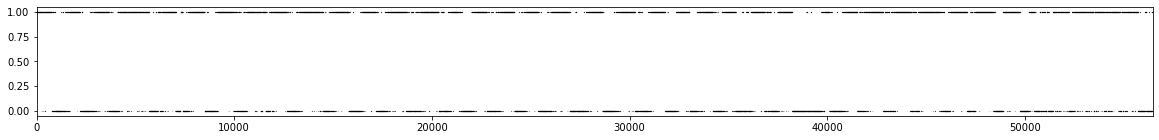

In [107]:
# print(Zxxx.shape)
# plt.figure(figsize=(20,5))
# plt.pcolormesh(t, f, Zxx, cmap='gray_r')
# plt.yticks()
# plt.show()

plt.figure(figsize=(20,2))
plt.scatter(np.arange(0,len(bin_vector),1), bin_vector, s=.001, c='k')
plt.yticks()
plt.xlim(0,len(bin_vector))
plt.show()

In [108]:
from scipy.ndimage import interpolation
masking = interpolation.zoom(bin_vector, zoom=len(samples)/len(bin_vector))
masking = np.ma.make_mask(masking)
signal_sample = np.ma.compressed(np.ma.masked_array(samples, ~masking, dtype=int))
# masking
# np.sca(bin_vector)

In [109]:
import array
sound = song

# now you have to convert back to an array.array
samples_array = array.array(song.array_type, signal_sample)

new_sound = sound._spawn(samples_array)

In [110]:
AudioSegment.converter = r"C:/ffmpeg/bin/ffmpeg.exe"

new_sound.export('./test/only_signal.mp3', 'mp3')

<_io.BufferedRandom name='./test/only_signal.mp3'>

In [111]:
~masking

array([False, False, False, ...,  True,  True,  True])

## Class distribution

In [42]:
# sample_rate, samples = wav.read(filename)
window_size: int = 512
f, t, Zxx = stft(samples, nperseg=window_size, window='hann', noverlap=window_size // (4/3), fs=22050)
y = np.log1p(np.abs(Zxx))
yy = y

In [8]:
window_size = 512
y = stft(samples, nfft=window_size, noverlap=window_size // (4/3), nperseg=512)

In [55]:
WINDOW_SIZE = 512
y = librosa.stft(samples, window='hann', n_fft=WINDOW_SIZE, hop_length=int(WINDOW_SIZE*.75))

In [10]:
np.abs(y)

<ipython-input-10-e2973663f413>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.abs(y)


array([array([0.        , 0.00195312, 0.00390625, 0.00585938, 0.0078125 ,
       0.00976562, 0.01171875, 0.01367188, 0.015625  , 0.01757812,
       0.01953125, 0.02148438, 0.0234375 , 0.02539062, 0.02734375,
       0.02929688, 0.03125   , 0.03320312, 0.03515625, 0.03710938,
       0.0390625 , 0.04101562, 0.04296875, 0.04492188, 0.046875  ,
       0.04882812, 0.05078125, 0.05273438, 0.0546875 , 0.05664062,
       0.05859375, 0.06054688, 0.0625    , 0.06445312, 0.06640625,
       0.06835938, 0.0703125 , 0.07226562, 0.07421875, 0.07617188,
       0.078125  , 0.08007812, 0.08203125, 0.08398438, 0.0859375 ,
       0.08789062, 0.08984375, 0.09179688, 0.09375   , 0.09570312,
       0.09765625, 0.09960938, 0.1015625 , 0.10351562, 0.10546875,
       0.10742188, 0.109375  , 0.11132812, 0.11328125, 0.11523438,
       0.1171875 , 0.11914062, 0.12109375, 0.12304688, 0.125     ,
       0.12695312, 0.12890625, 0.13085938, 0.1328125 , 0.13476562,
       0.13671875, 0.13867188, 0.140625  , 0.14257812, 

In [9]:
y = np.log1p(np.abs(y))
print(y.shape)

plt.figure(figsize=(20,20))
plt.imshow(y)
plt.show()

<ipython-input-9-1cf53d587227>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  y = np.log1p(np.abs(y))


TypeError: loop of ufunc does not support argument 0 of type numpy.ndarray which has no callable log1p method

In [61]:
np.abs(y).mean(axis=1)

array([6.28304382e+04, 1.04462780e+05, 8.75286162e+04, 4.60204978e+04,
       2.25476813e+04, 1.55888059e+04, 1.09801305e+04, 8.33599705e+03,
       6.47649924e+03, 5.01484234e+03, 3.63859439e+03, 2.87457076e+03,
       2.62294944e+03, 2.50459508e+03, 2.36393061e+03, 2.18805588e+03,
       1.99144598e+03, 1.74462763e+03, 1.64507322e+03, 1.72340180e+03,
       1.89757121e+03, 2.04295369e+03, 2.15700575e+03, 2.30240724e+03,
       2.32765800e+03, 2.22536122e+03, 2.13164061e+03, 2.10584258e+03,
       2.03754353e+03, 1.90901154e+03, 1.80663866e+03, 1.78633993e+03,
       1.75456032e+03, 1.73143115e+03, 1.73771511e+03, 1.75859472e+03,
       1.76799388e+03, 1.76520498e+03, 1.81163421e+03, 1.93506449e+03,
       2.01153812e+03, 2.05782918e+03, 2.02793409e+03, 2.10128159e+03,
       2.14181773e+03, 2.14600662e+03, 2.24589568e+03, 2.49843348e+03,
       2.68599180e+03, 2.73522402e+03, 2.75436696e+03, 2.65932049e+03,
       2.52377003e+03, 2.51411223e+03, 2.48285656e+03, 2.45846251e+03,
      

In [57]:
np.where(np.abs(y))

array([[0.00000000e+00, 8.56949634e+00, 1.87798279e+04, ...,
        5.16990253e+04, 9.16120080e+03, 9.08196171e+04],
       [0.00000000e+00, 1.34886854e+01, 1.76282691e+04, ...,
        7.91051055e+04, 1.51790782e+04, 1.03566949e+05],
       [0.00000000e+00, 2.38434256e+01, 1.34668678e+04, ...,
        5.50024239e+04, 6.32977975e+03, 5.47302859e+04],
       ...,
       [0.00000000e+00, 8.29581687e-01, 5.00545013e+00, ...,
        4.00457928e+00, 1.82535286e+00, 1.10968789e+02],
       [0.00000000e+00, 5.78522032e-01, 4.25811681e+00, ...,
        2.81850174e+00, 4.51150097e-01, 1.10251055e+02],
       [0.00000000e+00, 4.62821326e-01, 1.56689602e-01, ...,
        2.59829849e-01, 1.87042661e+00, 1.09329351e+02]])

(257, 4325)


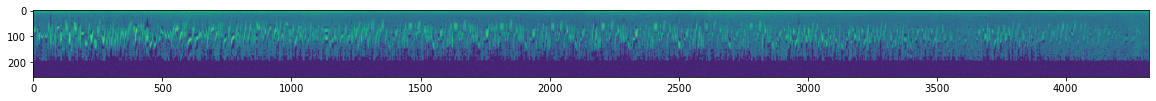

In [44]:
#, hop_length = 512)
# y = librosa.feature.melspectrogram(x, sr=44100, n_fft=WINDOW_SIZE, hop_length=WINDOW_SIZE)

y = np.log1p(np.abs(y))
print(y.shape)

plt.figure(figsize=(20,20))
plt.imshow(y)
plt.show()

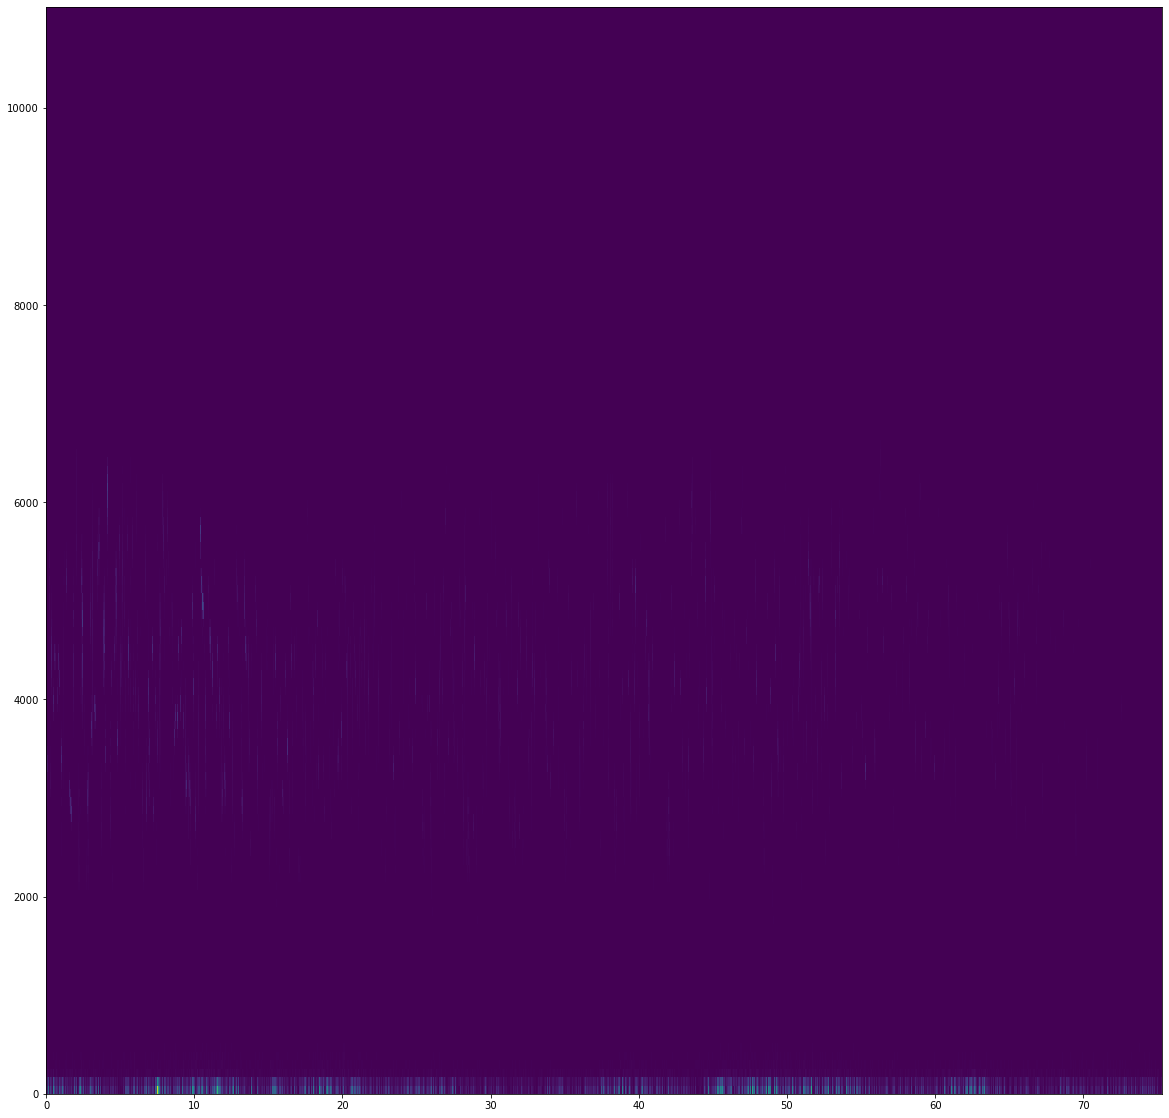

In [47]:
import scipy.io.wavfile as wav
import scipy.signal as signal
from matplotlib import pyplot as plt

# sample_rate, samples = wav.read(filename)
f, t, Zxx = signal.stft(samples, fs=22050)
plt.figure(figsize=(20,20))
plt.pcolormesh(t, f, np.abs(Zxx))